### Making use of one of the most popularly used dataset for image classification problems

### MNIST Dataset brief overview:
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9. The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

In [130]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot
import cv2

In [131]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [132]:
x_train.shape

(60000, 28, 28)

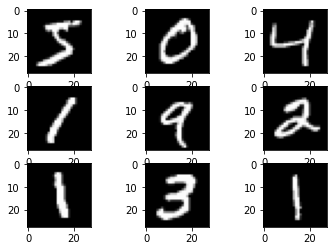

In [133]:
for i in range(9):  
    pyplot.subplot(331+i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
    #pyplot.title(y_train[i])
pyplot.show()

# Image preprocessing

In [134]:
img_rows, img_cols = x_train[0].shape
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train.astype("float")
x_test.astype("float")

x_train=x_train/255
x_test=x_test/255

In [135]:
x_train.shape[1:]

(28, 28, 1)

# One Hot Encoding for y

In [136]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [137]:
opt_class_len = y_train[0].shape[0]

# Model creation

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Dropout(0.1))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(opt_class_len, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 27, 27, 32)        25632     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 26, 26, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 21632)           

# Model training

In [139]:
history = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 176s 94ms/step - loss: 0.1242 - accuracy: 0.9621 - val_loss: 0.0387 - val_accuracy: 0.9866
Epoch 2/2
1875/1875 [==============================] - 175s 93ms/step - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.0321 - val_accuracy: 0.9892


# Plotting Loss and accuracy charts

{'loss': [0.12423522770404816, 0.05145205929875374], 'accuracy': [0.9620500206947327, 0.9843999743461609], 'val_loss': [0.038657546043395996, 0.03213714435696602], 'val_accuracy': [0.9865999817848206, 0.9891999959945679]}


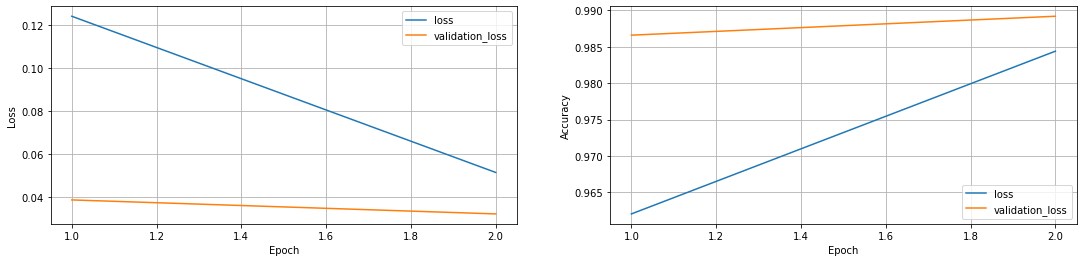

In [140]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots_adjust

print(history.history)
history_dict = history.history
loss_value = history_dict['loss']
validation_loss_value = history_dict['val_loss']
accuracy_value = history_dict['accuracy']
validation_accuracy_value = history_dict['val_accuracy']
epochs = range(1, len(loss_value)+1)

plt.subplot(121)
line1 = plt.plot(epochs, loss_value, label="loss")
line2 = plt.plot(epochs, validation_loss_value, label="validation_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
#plt.show()

plt.subplot(122)
line1 = plt.plot(epochs, accuracy_value, label="loss")
line2 = plt.plot(epochs, validation_accuracy_value, label="validation_loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.subplots_adjust(wspace=0.2, right=2.5)
plt.show()

Model accuracy and loss looks good. We can go ahead and save this model and use it when required.

In [148]:
model.save("Mnist_classification_model.h5")